In [1]:
## 데이터 불러와서 결측치 보기

import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('bike_sharing_daily.csv')
dfe = pd.read_csv('country_timeseries.csv')

## 결측치 전처리 살펴보기!

In [ ]:
df.isna().sum()

instant        0
dteday         0
season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp          17
atemp         24
hum           25
windspeed     13
casual        11
registered    11
cnt            0
dtype: int64

<Axes: >

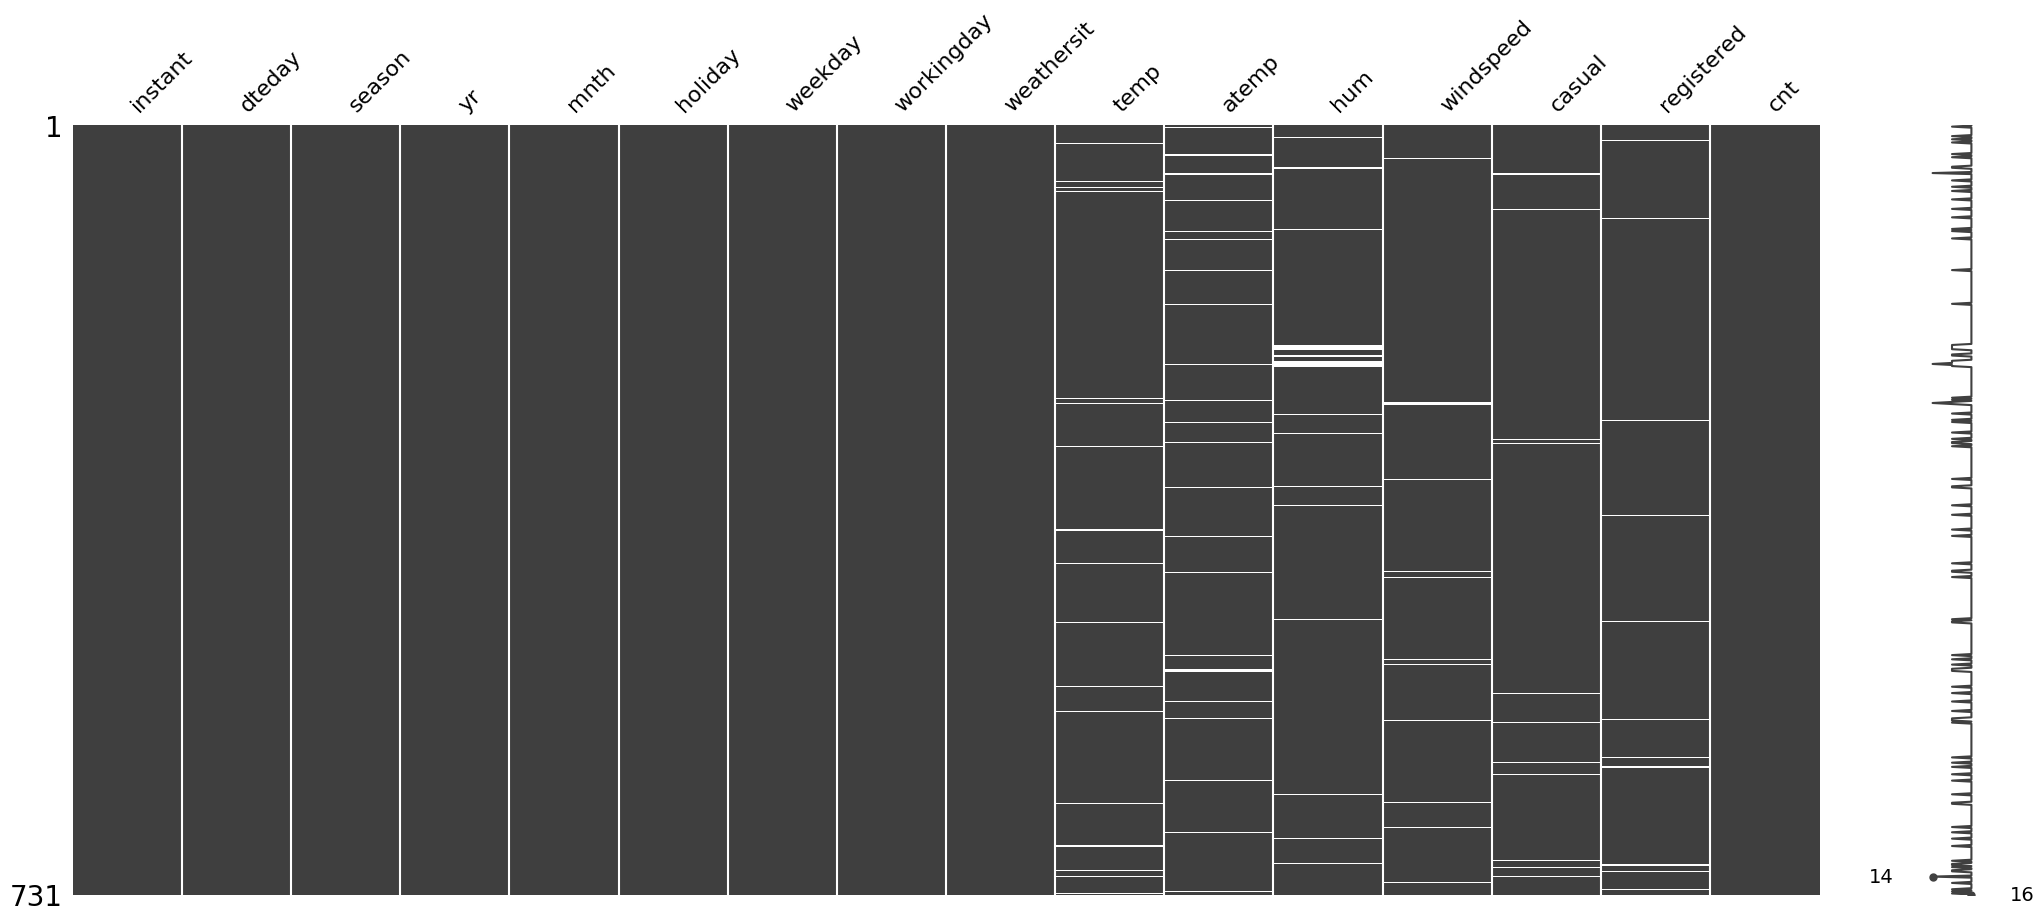

In [ ]:
msno.matrix(df)

<Axes: >

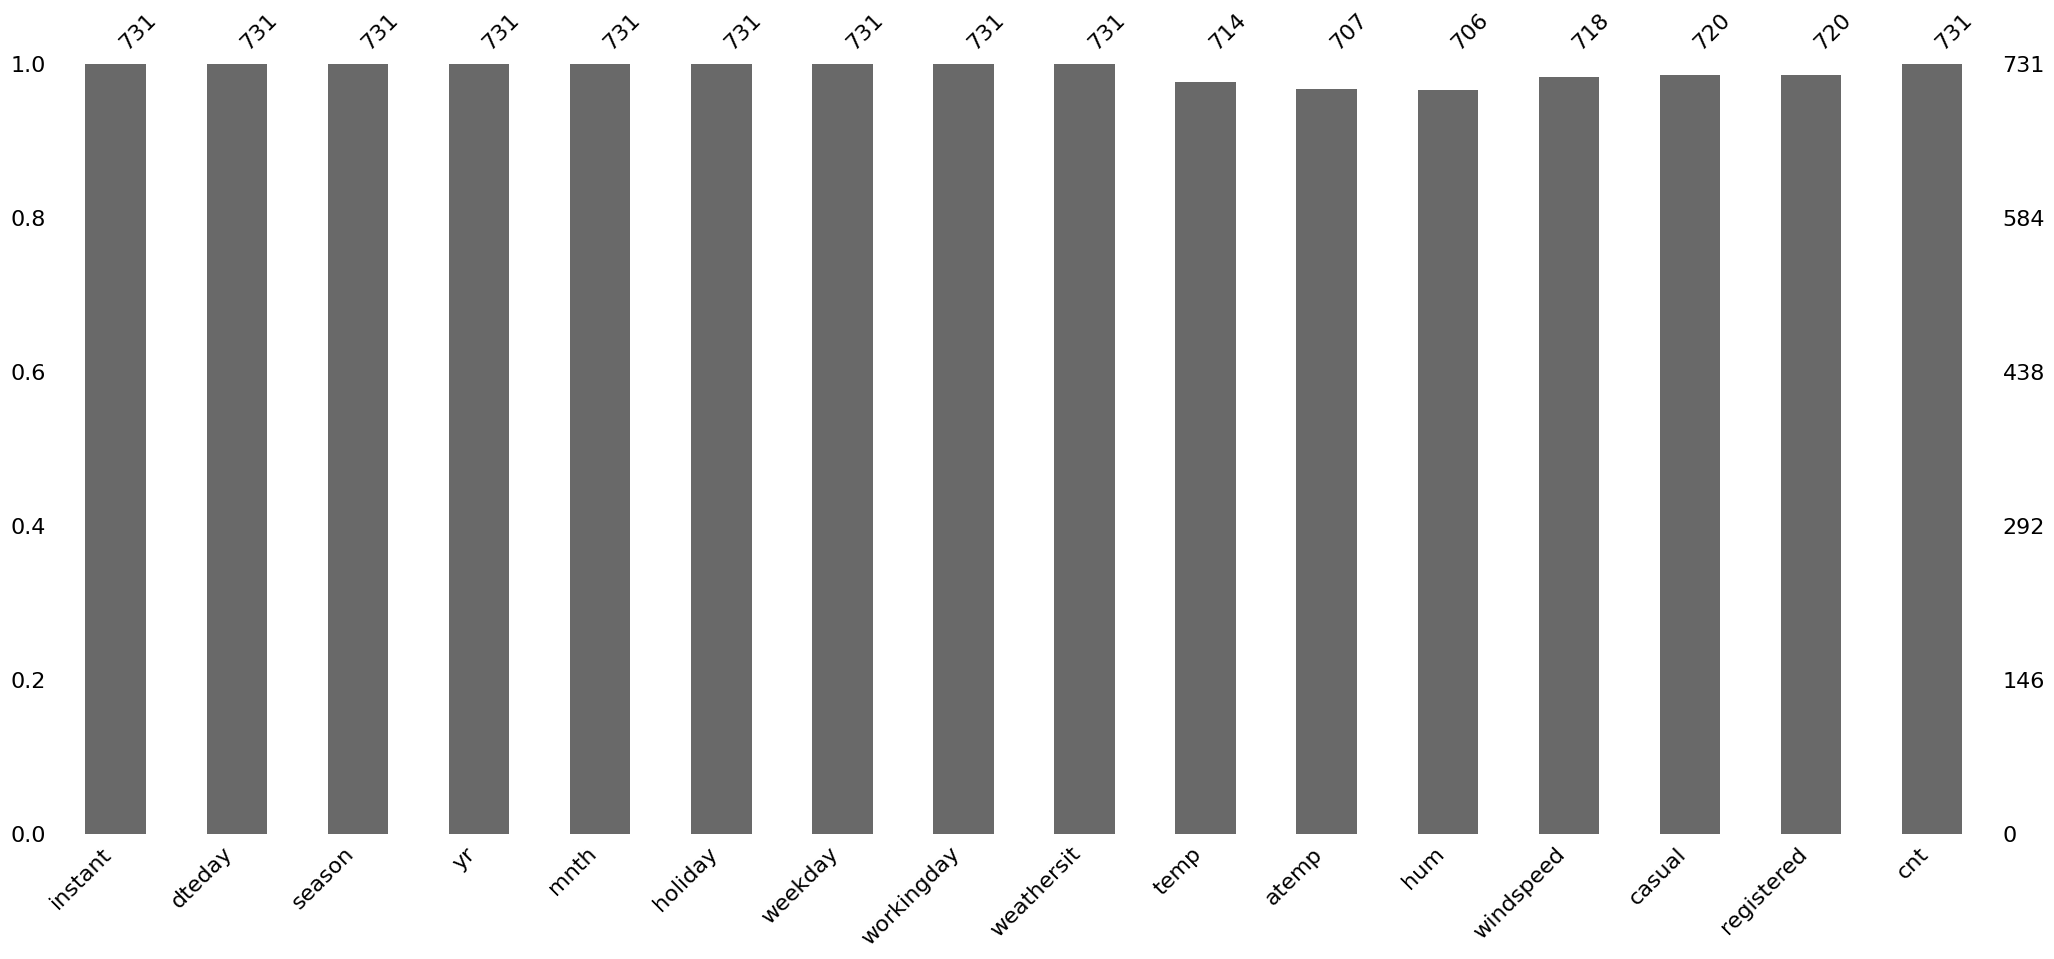

In [ ]:
msno.bar(df)

<Axes: >

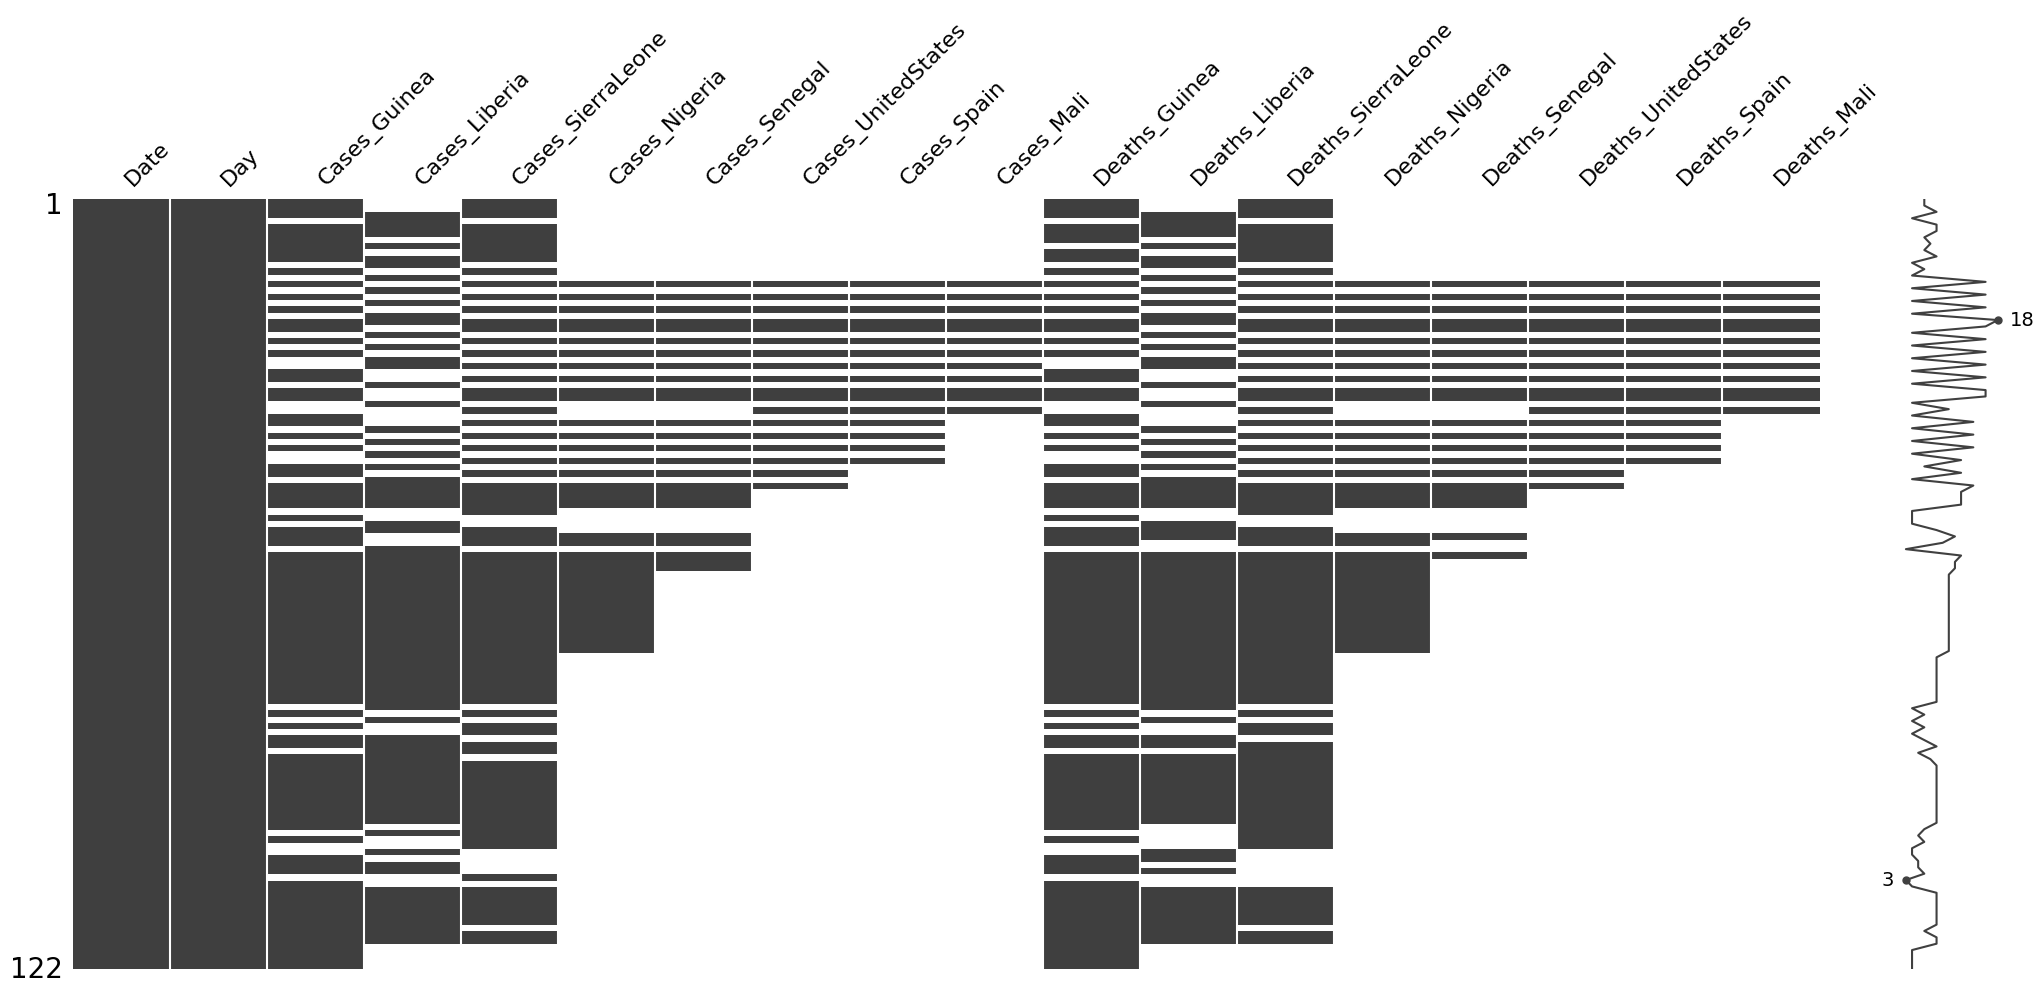

In [ ]:
msno.matrix(dfe)

- 1% 미만 정도면 결측치 날려도 큰 영향은 없을 수 있지만
- 결측치가 많아지면 -> 이 부분을 어떻게 처리해야 하나?
- 결측치를 채울 수 있는 경우와 채울 수 없는 경우

- MCAR
- MAR
- NMAR
- 이런 부분을 고민했을 때 우리가 생각해야 되는 것들이 어떤 식으로 결측치가 만들어 지는 것이고? 그 결측치를 어떻게 처리해야 되는가?
- 도메인 지식 봤을 때 결국 비즈니스나, 데이터 베이스 로직에 따라서 데이터 결측치를 채워야 한다.

## 결측치 처리
- 결측치를 삭제
- 평균, 중위값 등등 통계적인 수치로 대입
- 보간법
- 도메인 로직에 의한 데이터 결측치 처리
- ML을 통한 데이터 결측치 처리할 수 있다.
- 클래스별에 따른 결측치 처리 -> ML 하기 위한 과정이라면-> 이 결측치를 결국 class에 따라 분류될테니, class에 대한 값을 통해서 결측치 처리

In [ ]:
df_sp= dfe.iloc[0:15, 0:5]

In [ ]:
df_sp.dropna()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
2,1/3/2015,287,2769.0,8166.0,9722.0
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
7,12/24/2014,277,2630.0,7977.0,9203.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [ ]:
dfe

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,66.0,6.0,5.0,NaN,NaN,NaN,NaN,NaN
118,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfe.dropna()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
19,11/18/2014,241,2047.0,7082.0,6190.0,20.0,1.0,4.0,1.0,6.0,1214.0,2963.0,1267.0,8.0,0.0,1.0,0.0,6.0


In [ ]:
df_sp

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone
0,1/5/2015,289,2776.0,NaN,10030.0
1,1/4/2015,288,2775.0,NaN,9780.0
2,1/3/2015,287,2769.0,8166.0,9722.0
3,1/2/2015,286,NaN,8157.0,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0
5,12/28/2014,281,2706.0,8018.0,9446.0
6,12/27/2014,280,2695.0,NaN,9409.0
7,12/24/2014,277,2630.0,7977.0,9203.0
8,12/21/2014,273,2597.0,NaN,9004.0
9,12/20/2014,272,2571.0,7862.0,8939.0


In [ ]:
# 평균으로 Cases_Guinea 해당 na값을 넣는 경우
df_sp['Cases_Guinea'].fillna(df_sp['Cases_Guinea'].mean()).to_frame()

,Cases_Guinea
0,2776.000000
1,2775.000000
2,2769.000000
3,2632.454545
4,2730.000000
5,2706.000000
6,2695.000000
7,2630.000000
8,2597.000000
9,2571.000000


In [ ]:
#na값에 대한 0값으로 대체
df_sp['Cases_Guinea'].fillna(0).to_frame()

,Cases_Guinea
0,2776.0
1,2775.0
2,2769.0
3,0.0
4,2730.0
5,2706.0
6,2695.0
7,2630.0
8,2597.0
9,2571.0


- ffil, bfill 두 가지 방법도 사용 가능

- ffill 정방향으로 채우는 방법
- bfill 역방향으로 채우는 방법

In [ ]:
df_sp['Cases_Guinea'].fillna(method='ffill').to_frame()

,Cases_Guinea
0,2776.0
1,2775.0
2,2769.0
3,2769.0
4,2730.0
5,2706.0
6,2695.0
7,2630.0
8,2597.0
9,2571.0


In [ ]:
df_sp['Cases_Guinea'].fillna(method='bfill').to_frame()

,Cases_Guinea
0,2776.0
1,2775.0
2,2769.0
3,2730.0
4,2730.0
5,2706.0
6,2695.0
7,2630.0
8,2597.0
9,2571.0


- 보간법으로 채우기
- 중간값  (위와 아래의 중간값으로 나온다)

In [ ]:
df_sp['Cases_Guinea'].interpolate().to_frame()

,Cases_Guinea
0,2776.0
1,2775.0
2,2769.0
3,2749.5
4,2730.0
5,2706.0
6,2695.0
7,2630.0
8,2597.0
9,2571.0


- 보간법에 여러 메서드가 있다.
- ethod must be one of
- ['linear', 'time', 'index', 'values', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'barycentric', 'krogh', 'spline', 'polynomial', 'from_derivatives', 'piecew
ise_polynomial', 'pchip', 'akima', 'cubicspline']

- 선형보간 (linear)
- time 날짜별, 시간 단위로 차이 고려해서 간격처리
- index, values 인덱스 숫자로 진행
- nearest, slinear, quadratic, cubic, interploate,inter1d  인덱스 숫자를 사용해서 진행
- spline, polynomial - 2차, 다항식으로 보간하는 방법
- 기존의 보간을 다른 방식으로 다양하게 진행할 수 있다.

In [ ]:
df_sp['Cases_Guinea'].interpolate(method='quadratic').to_frame()

,Cases_Guinea
0,2776.000000
1,2775.000000
2,2769.000000
3,2753.419112
4,2730.000000
5,2706.000000
6,2695.000000
7,2630.000000
8,2597.000000
9,2571.000000


In [ ]:
df_sp['Cases_Guinea'].interpolate(method='linear').to_frame()

,Cases_Guinea
0,2776.0
1,2775.0
2,2769.0
3,2749.5
4,2730.0
5,2706.0
6,2695.0
7,2630.0
8,2597.0
9,2571.0


In [ ]:
dfe['Cases_Liberia'].isna().sum()

39

- 보간법을 통한 시각화 그래프를 통해 어떤 식으로 진행되는지 확인해 보자!

<Axes: >

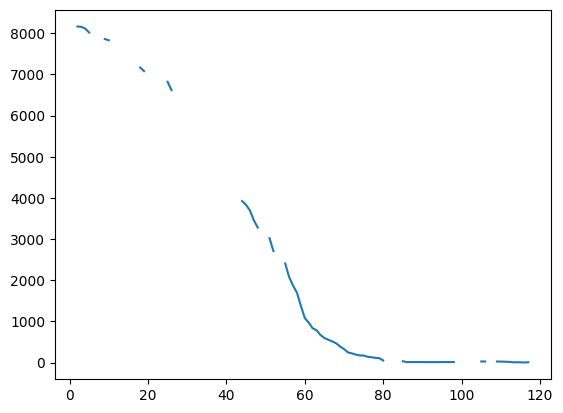

In [ ]:
dfe['Cases_Liberia'].plot()

<Axes: >

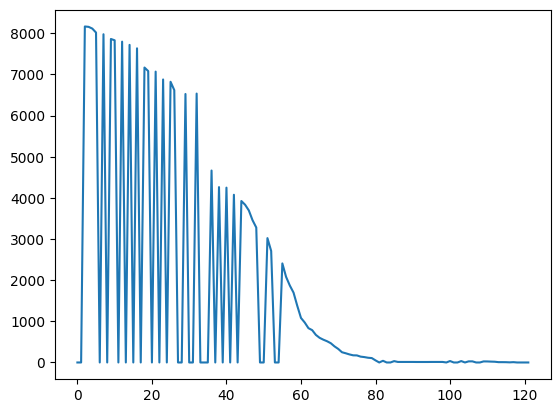

In [ ]:
dfe['Cases_Liberia'].fillna(0).plot()

- 평균으로 진행하는 경우?

In [ ]:
dfe['Cases_Liberia'].mean()

2335.3373493975905

In [ ]:
dfe['Cases_Liberia'].median()

516.0

<Axes: >

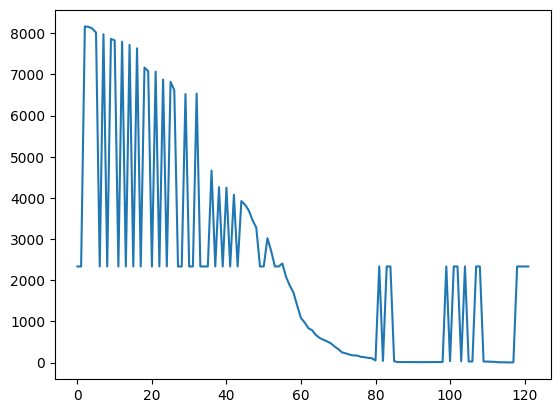

In [ ]:
#평균으로 보간
dfe['Cases_Liberia'].fillna(2335.3373493975905).plot()

<Axes: >

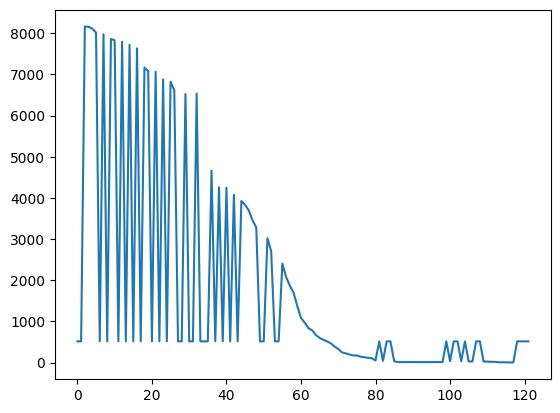

In [ ]:
#median으로
dfe['Cases_Liberia'].fillna(516.0).plot()

<Axes: >

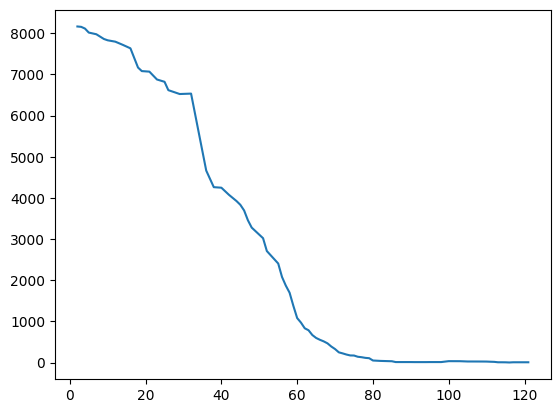

In [ ]:
#median으로
dfe['Cases_Liberia'].interpolate().plot()

<Axes: >

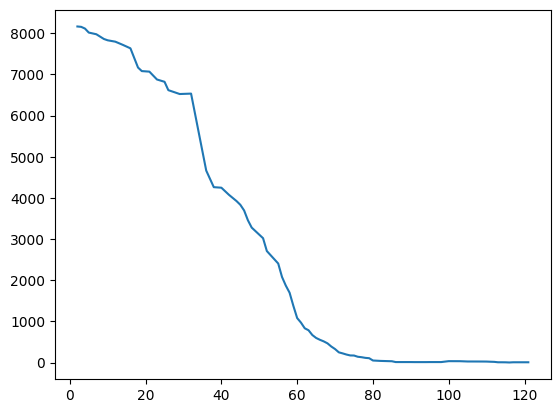

In [ ]:
#median으로
dfe['Cases_Liberia'].interpolate(method='linear').plot()

<Axes: >

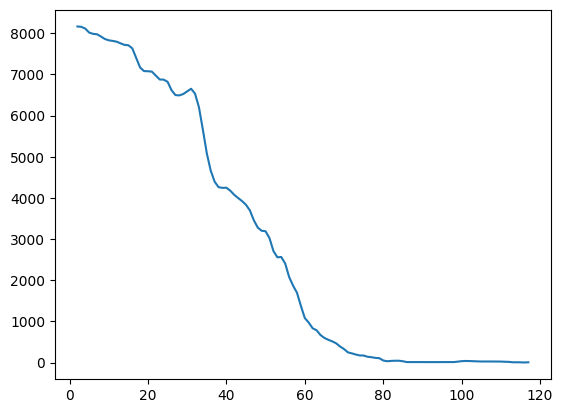

In [ ]:
#median으로
dfe['Cases_Liberia'].interpolate(method='quadratic').plot()

<Axes: >

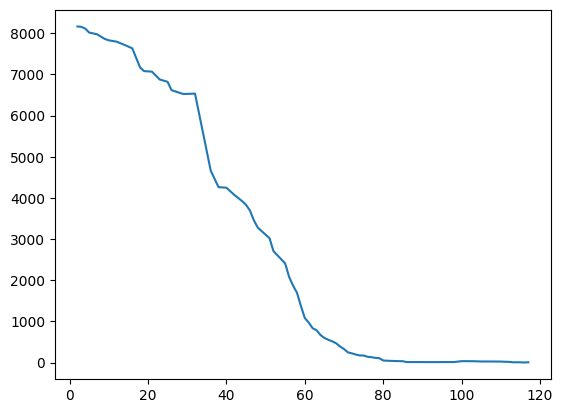

In [ ]:
#median으로
dfe['Cases_Liberia'].interpolate(method='slinear').plot()

<Axes: >

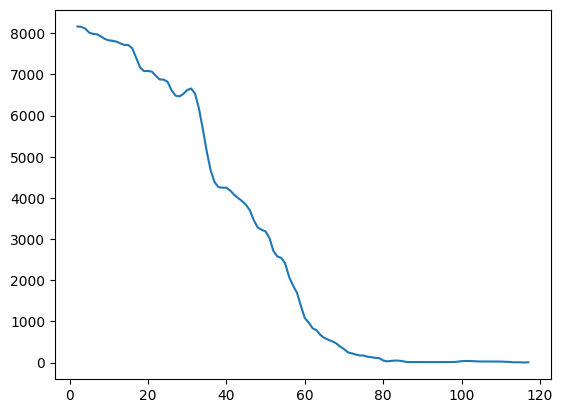

In [ ]:
#median으로
dfe['Cases_Liberia'].interpolate(method='cubic').plot()

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

- simpleimputer

In [ ]:
from sklearn.impute import SimpleImputer
# 통계치들 쉽게 대입해서 결측치 대처하는 법

- Ms 값 채울 때 다양한 방법으로 쉽게 채울 수 있다.
- mean
- median
- most_frequent
- constant

In [ ]:
sim_mean=SimpleImputer(strategy = 'mean')

In [ ]:
dfe['Cases_Liberia']

0         NaN
1         NaN
2      8166.0
3      8157.0
4      8115.0
        ...  
117       8.0
118       NaN
119       NaN
120       NaN
121       NaN
Name: Cases_Liberia, Length: 122, dtype: float64

In [ ]:
np.array(dfe['Cases_Liberia']).reshape(-1,1)

array([[      nan],
       [      nan],
       [8.166e+03],
       [8.157e+03],
       [8.115e+03],
       [8.018e+03],
       [      nan],
       [7.977e+03],
       [      nan],
       [7.862e+03],
       [7.830e+03],
       [      nan],
       [7.797e+03],
       [      nan],
       [7.719e+03],
       [      nan],
       [7.635e+03],
       [      nan],
       [7.168e+03],
       [7.082e+03],
       [      nan],
       [7.069e+03],
       [      nan],
       [6.878e+03],
       [      nan],
       [6.822e+03],
       [6.619e+03],
       [      nan],
       [      nan],
       [6.525e+03],
       [      nan],
       [      nan],
       [6.535e+03],
       [      nan],
       [      nan],
       [      nan],
       [4.665e+03],
       [      nan],
       [4.262e+03],
       [      nan],
       [4.249e+03],
       [      nan],
       [4.076e+03],
       [      nan],
       [3.924e+03],
       [3.834e+03],
       [3.696e+03],
       [3.458e+03],
       [3.280e+03],
       [      nan],


In [ ]:
sim_mean.fit(np.array(dfe['Cases_Liberia']).reshape(-1,1))


SimpleImputer()

In [ ]:
print(sim_mean.transform(np.array(dfe['Cases_Liberia']).reshape(-1,1)))

[[2.33533735e+03]
 [2.33533735e+03]
 [8.16600000e+03]
 [8.15700000e+03]
 [8.11500000e+03]
 [8.01800000e+03]
 [2.33533735e+03]
 [7.97700000e+03]
 [2.33533735e+03]
 [7.86200000e+03]
 [7.83000000e+03]
 [2.33533735e+03]
 [7.79700000e+03]
 [2.33533735e+03]
 [7.71900000e+03]
 [2.33533735e+03]
 [7.63500000e+03]
 [2.33533735e+03]
 [7.16800000e+03]
 [7.08200000e+03]
 [2.33533735e+03]
 [7.06900000e+03]
 [2.33533735e+03]
 [6.87800000e+03]
 [2.33533735e+03]
 [6.82200000e+03]
 [6.61900000e+03]
 [2.33533735e+03]
 [2.33533735e+03]
 [6.52500000e+03]
 [2.33533735e+03]
 [2.33533735e+03]
 [6.53500000e+03]
 [2.33533735e+03]
 [2.33533735e+03]
 [2.33533735e+03]
 [4.66500000e+03]
 [2.33533735e+03]
 [4.26200000e+03]
 [2.33533735e+03]
 [4.24900000e+03]
 [2.33533735e+03]
 [4.07600000e+03]
 [2.33533735e+03]
 [3.92400000e+03]
 [3.83400000e+03]
 [3.69600000e+03]
 [3.45800000e+03]
 [3.28000000e+03]
 [2.33533735e+03]
 [2.33533735e+03]
 [3.02200000e+03]
 [2.71000000e+03]
 [2.33533735e+03]
 [2.33533735e+03]
 [2.407000

In [ ]:
imputer=IterativeImputer(imputation_order= 'descending', max_iter=10, random_state=111, n_nearest_features=3)

In [ ]:
dfe_sp =dfe[['Cases_Guinea','Cases_Liberia','Cases_SierraLeone','Cases_Nigeria']]

In [ ]:
dfe_sp_imp=imputer.fit_transform(dfe_sp)

/opt/anaconda3/envs/bda/lib/python3.8/site-packages/sklearn/impute/_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
dfe_sp

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria
0,2776.0,NaN,10030.0,NaN
1,2775.0,NaN,9780.0,NaN
2,2769.0,8166.0,9722.0,NaN
3,NaN,8157.0,NaN,NaN
4,2730.0,8115.0,9633.0,NaN
...,...,...,...,...
117,103.0,8.0,6.0,NaN
118,86.0,NaN,NaN,NaN
119,86.0,NaN,NaN,NaN
120,86.0,NaN,NaN,NaN


In [ ]:
pd.DataFrame(dfe_sp_imp)

,0,1,2,3
0,2776.000000,8654.000808,10030.000000,19.215732
1,2775.000000,8694.794108,9780.000000,20.204210
2,2769.000000,8166.000000,9722.000000,17.821626
3,2567.210472,8157.000000,8232.439905,22.751914
4,2730.000000,8115.000000,9633.000000,17.860935
...,...,...,...,...
117,103.000000,8.000000,6.000000,10.513596
118,86.000000,-562.354042,-853.614631,10.646143
119,86.000000,-562.354042,-853.614631,10.646143
120,86.000000,-562.354042,-853.614631,10.646143


### 결측치 대처에 따른 mse 정도 비교해 보는 시간

In [ ]:
import seaborn as sns

In [ ]:
df_mpg= sns.load_dataset('mpg')

- 다양한 결측치 방법으로 선형회귀 정도 살펴보면서 어떤 식으로 수치가 바뀌는지 확인한다.
- 결측치 처리 방법이 좋다? 라는 뜻은 아니고
- 실제 결측치를 다르게 대입했을 때 결과들이 다르다는 것을 확인하면 좋다.

- mse -> 잔차를 줄이는 방법 -> 정규분포 , 잔차들 등분산성, 정규성 가정-> 이 가정들을 맞춰주면 정말 ? mse 낮아지는가?

In [ ]:
df_mpg.dropna(inplace=True)

In [ ]:
df_x=df_mpg[['cylinders','displacement','horsepower','weight']]

- 결측치를 만들어 주자!

In [ ]:
import random

In [ ]:
mvs = np.random.randint(0,392, size=30)

In [ ]:
df_x.iloc[mvs]=np.nan

In [ ]:
df_x.isna().sum()

cylinders       28
displacement    28
horsepower      28
weight          28
dtype: int64

In [ ]:
df_x

,cylinders,displacement,horsepower,weight
0,8.0,307.0,130.0,3504.0
1,8.0,350.0,165.0,3693.0
2,8.0,318.0,150.0,3436.0
3,8.0,304.0,150.0,3433.0
4,NaN,NaN,NaN,NaN
...,...,...,...,...
393,4.0,140.0,86.0,2790.0
394,4.0,97.0,52.0,2130.0
395,4.0,135.0,84.0,2295.0
396,4.0,120.0,79.0,2625.0


In [ ]:
df_mpg['mpg'].dropna()

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

<Axes: >

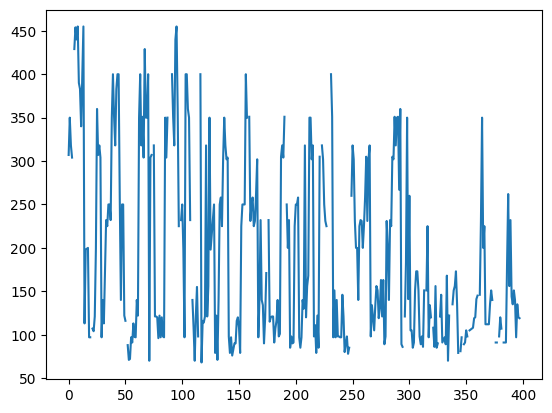

In [ ]:
df_x['displacement'].plot()

- 단순하게 평균으로 대체하는 경우

In [ ]:
df_x.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight'], dtype='object')

In [ ]:
df_x['cylinders'].mean()

5.475274725274725

In [ ]:
df_x['displacement'].mean()

195.31730769230768

In [ ]:
df_x['horsepower'].mean()

104.92307692307692

In [ ]:
df_x['weight'].mean()

2982.2774725274726

In [ ]:
df_x_mean=df_x.copy()

In [ ]:
df_x_mean['cylinders']=df_x_mean['cylinders'].fillna(df_x['cylinders'].mean())
df_x_mean['displacement']=df_x_mean['displacement'].fillna(df_x['displacement'].mean())
df_x_mean['horsepower']= df_x_mean['horsepower'].fillna(df_x['horsepower'].mean())
df_x_mean['weight']=df_x_mean['weight'].fillna(df_x['weight'].mean())

In [ ]:
df_x_mean.isna().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
dtype: int64

In [ ]:
#데이터 세트 분리하기
#모델링 전에 train,test로 데이터를 예측하거나 모델링의 하기위한 학습 전에 나누는 작업
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x_mean, df_mpg['mpg'], test_size=0.3, random_state=111)

In [ ]:
# statmodel 에서 제공하는 OLS 회귀를 통해 학습
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
fit_train1 = sm.OLS(y_train, x_train) #평균으로 대체한 값들의 회귀 분석

In [ ]:
fit_train1=fit_train1.fit()

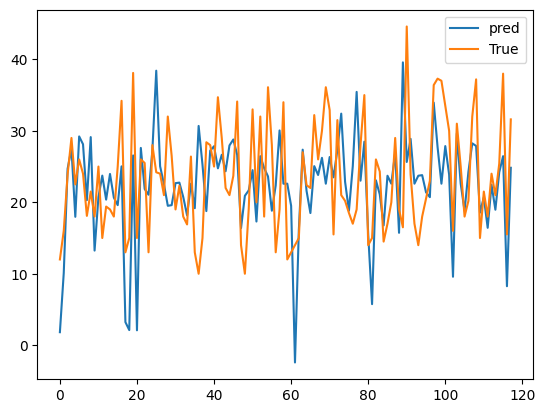

In [ ]:
# predict(x_test)값으로 -> 예측한 값
plt.plot(np.array(fit_train1.predict(x_test)), label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [ ]:
#mse 메트릭스
from sklearn.metrics import mean_squared_error

mse1_mean = mean_squared_error(y_true= y_test, y_pred=fit_train1.predict(x_test))
print(mse1_mean)

57.60135065420575


- 만약 0을 넣고 한다면?

In [ ]:
df_x_zero=df_x.copy()

In [ ]:
df_x_zero['cylinders']=df_x_zero['cylinders'].fillna(0)
df_x_zero['displacement']=df_x_zero['displacement'].fillna(0)
df_x_zero['horsepower']= df_x_zero['horsepower'].fillna(0)
df_x_zero['weight']=df_x_zero['weight'].fillna(0)

In [ ]:
#데이터 세트 분리하기
#모델링 전에 train,test로 데이터를 예측하거나 모델링의 하기위한 학습 전에 나누는 작업
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x_zero, df_mpg['mpg'], test_size=0.3, random_state=111)

In [ ]:
fit_train1 = sm.OLS(y_train, x_train) #평균으로 대체한 값들의 회귀 분석
fit_train1=fit_train1.fit()

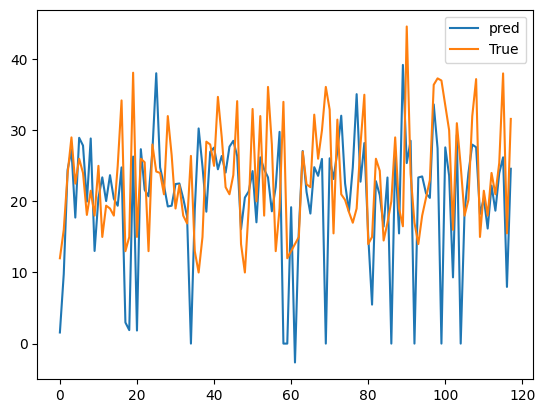

In [ ]:
# predict(x_test)값으로 -> 예측한 값
plt.plot(np.array(fit_train1.predict(x_test)), label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [ ]:
#mse 메트릭스
from sklearn.metrics import mean_squared_error

mse1_mean = mean_squared_error(y_true= y_test, y_pred=fit_train1.predict(x_test))
print(mse1_mean)

102.42812720692478


- 복습과제는 위의 코드를 직접 손으로 코딩하면서 이해하고, 컬럼이나 이런 값들을 조금씩 다르게 바꿔보고 제출해야하는 것

- 필수과제 1
- 기간은 3주차 이후에 제출하면 된다. 운영진분들이 2주차 과제 제출하세요라고 하면 그때 같이 제출하시면 됩니다.

- mpg 데이터의 결측치를
- 1. median 대체 (simpleimputer)
- 2. 선형보간
- 3. IterativeImputer

- 3가지 결측치를 대체하여서 -> MSE와 실제값과 예측값의 그래프를 그려주시고
- 그 값들이 차이가 나는 이유를 개인적으로 정리해서 주석처리 해주세요!